In [1]:
import tushare as ts

import pandas as pd
from datetime import datetime
from copy import deepcopy
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller
import warnings
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.linear_model import LinearRegression
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = 15, 5
%matplotlib inline

# Feature exploration

### retrieve data

In [33]:
# Get historical data of stock 002639 from 2016-01-01 to 2016-12-31
# To learn tushare API and get your token, check https://tushare.pro/document/1?doc_id=40
# ts.set_token('your token here')
ts.set_token('654d36bf9bb086cb8c973e0f259e38c3efe2497538*********cf2')
# This is my token, please change yours.

pro = ts.pro_api()
wdyx = pro.query('daily', ts_code='002639.SZ', start_date='20170101', end_date='20171231')
#wdyx = ts.get_h_data('002639', start='2017-01-01', end='2017-12-31') old version
wdyx

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,002639.SZ,20171229,8.18,8.18,8.03,8.11,8.10,0.01,0.12,26187.00,21225.591
1,002639.SZ,20171228,8.09,8.18,8.07,8.10,8.15,-0.05,-0.61,36546.33,29684.228
2,002639.SZ,20171227,8.06,8.22,8.01,8.15,8.05,0.10,1.24,34887.97,28273.584
3,002639.SZ,20171226,8.07,8.09,7.97,8.05,8.10,-0.05,-0.62,36743.03,29473.064
4,002639.SZ,20171225,8.22,8.33,8.05,8.10,8.23,-0.13,-1.58,35602.03,29033.363
...,...,...,...,...,...,...,...,...,...,...,...
239,002639.SZ,20170109,12.30,12.30,11.88,12.01,12.35,-0.34,-2.75,163287.48,196582.244
240,002639.SZ,20170106,12.61,12.64,12.27,12.35,12.64,-0.29,-2.29,160914.51,199393.112
241,002639.SZ,20170105,12.75,12.78,12.57,12.64,12.77,-0.13,-1.02,144837.61,183007.786
242,002639.SZ,20170104,12.31,12.78,12.31,12.77,12.35,0.42,3.40,224608.68,283645.919


In [58]:
wdyx.index[wdyx['trade_date']=='20171009']

Int64Index([59], dtype='int64')

In [36]:
datas = list(deepcopy(wdyx.index))
datas

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [37]:
values = list(deepcopy(wdyx['close']))
values

[8.11,
 8.1,
 8.15,
 8.05,
 8.1,
 8.23,
 8.12,
 8.13,
 8.07,
 8.09,
 7.92,
 8.01,
 8.05,
 8.04,
 8.12,
 8.08,
 7.9,
 7.94,
 7.97,
 8.16,
 8.25,
 8.09,
 8.22,
 8.26,
 8.29,
 8.35,
 8.4,
 8.59,
 8.49,
 8.4,
 8.3,
 8.94,
 9.07,
 9.04,
 9.12,
 8.92,
 9.1,
 9.0,
 8.82,
 8.75,
 8.6,
 8.57,
 8.65,
 8.77,
 8.61,
 9.01,
 9.01,
 9.01,
 8.89,
 9.01,
 9.49,
 9.38,
 9.29,
 9.49,
 9.42,
 10.19,
 10.6,
 10.77,
 10.6,
 10.81,
 10.49,
 10.39,
 10.7,
 10.65,
 10.6,
 11.67,
 11.2,
 10.18,
 10.18,
 10.52,
 10.31,
 10.68,
 10.43,
 10.19,
 9.59,
 9.17,
 9.28,
 9.5,
 9.18,
 9.25,
 9.05,
 8.87,
 8.9,
 8.91,
 9.04,
 8.96,
 9.05,
 8.81,
 9.13,
 9.17,
 8.93,
 8.84,
 8.93,
 8.89,
 9.03,
 8.7,
 8.33,
 8.14,
 8.16,
 8.19,
 8.21,
 8.17,
 8.14,
 8.29,
 8.24,
 8.26,
 8.3,
 8.2,
 8.14,
 8.17,
 8.13,
 8.24,
 8.29,
 8.3,
 8.24,
 9.15,
 9.1,
 9.2,
 9.12,
 9.4,
 9.56,
 9.31,
 9.23,
 9.15,
 9.11,
 9.09,
 9.05,
 9.06,
 9.25,
 8.88,
 8.8,
 8.7,
 9.02,
 9.2,
 8.78,
 8.73,
 8.8,
 8.67,
 8.59,
 8.51,
 8.66,
 8.8,
 8.98,
 8.34,
 

In [69]:
# Parse a time string into a time tuple according to the specified format. In this code, 2017-10-09 (National Day) is used as the split point of train/test
# date_thresh = datetime.strptime('2017-10-01', '%Y-%m-%d').date()
index = list(np.arange(len(data)))
wdyx['index'] = index
wdyx = wdyx.sort_values(by=['index'], ascending=(False))
wdyx.set_index('index',inplace=True)
wdyx

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
index,,,,,,,,,,,
243,002639.SZ,20171229,8.18,8.18,8.03,8.11,8.10,0.01,0.12,26187.00,21225.591
242,002639.SZ,20171228,8.09,8.18,8.07,8.10,8.15,-0.05,-0.61,36546.33,29684.228
241,002639.SZ,20171227,8.06,8.22,8.01,8.15,8.05,0.10,1.24,34887.97,28273.584
240,002639.SZ,20171226,8.07,8.09,7.97,8.05,8.10,-0.05,-0.62,36743.03,29473.064
239,002639.SZ,20171225,8.22,8.33,8.05,8.10,8.23,-0.13,-1.58,35602.03,29033.363
...,...,...,...,...,...,...,...,...,...,...,...
4,002639.SZ,20170109,12.30,12.30,11.88,12.01,12.35,-0.34,-2.75,163287.48,196582.244
3,002639.SZ,20170106,12.61,12.64,12.27,12.35,12.64,-0.29,-2.29,160914.51,199393.112
2,002639.SZ,20170105,12.75,12.78,12.57,12.64,12.77,-0.13,-1.02,144837.61,183007.786


In [63]:
data = pd.DataFrame({'Close': values}, index=datas)
data

,Close
0,8.11
1,8.10
2,8.15
3,8.05
4,8.10
...,...
239,12.01
240,12.35
241,12.64
242,12.77


In [66]:
datas = list(deepcopy(wdyx.index))
datas

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
243,002639.SZ,20170103,12.49,12.49,12.26,12.35,12.33,0.02,0.16,118469.22,146344.873
242,002639.SZ,20170104,12.31,12.78,12.31,12.77,12.35,0.42,3.40,224608.68,283645.919
241,002639.SZ,20170105,12.75,12.78,12.57,12.64,12.77,-0.13,-1.02,144837.61,183007.786
240,002639.SZ,20170106,12.61,12.64,12.27,12.35,12.64,-0.29,-2.29,160914.51,199393.112
239,002639.SZ,20170109,12.30,12.30,11.88,12.01,12.35,-0.34,-2.75,163287.48,196582.244
...,...,...,...,...,...,...,...,...,...,...,...
4,002639.SZ,20171225,8.22,8.33,8.05,8.10,8.23,-0.13,-1.58,35602.03,29033.363
3,002639.SZ,20171226,8.07,8.09,7.97,8.05,8.10,-0.05,-0.62,36743.03,29473.064
2,002639.SZ,20171227,8.06,8.22,8.01,8.15,8.05,0.10,1.24,34887.97,28273.584
1,002639.SZ,20171228,8.09,8.18,8.07,8.10,8.15,-0.05,-0.61,36546.33,29684.228


In [77]:
wdyx[wdyx['trade_date']=='20171009']

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
index,,,,,,,,,,,
184,002639.SZ,20171009,10.7,10.99,10.52,10.81,10.49,0.32,3.05,275427.98,296367.536


Text(0.5, 1.0, 'Snow boy Closing rate - Year 2017')

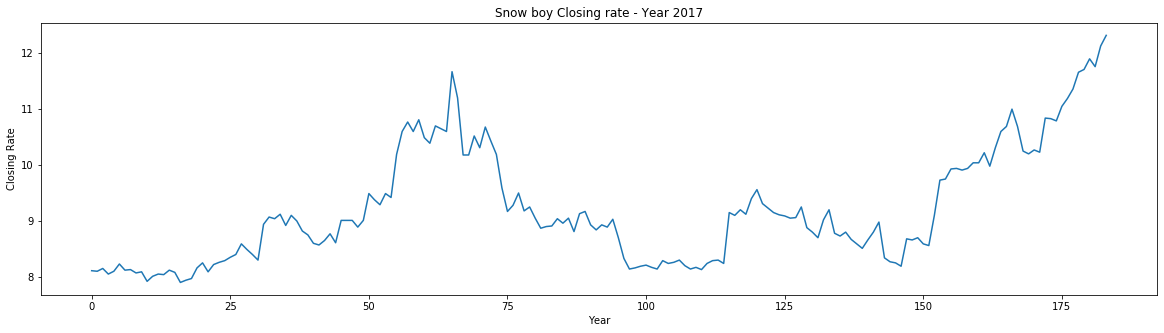

In [78]:
ind_ = 184
data_train = data.iloc[: ind_]
data_test = data.iloc[ind_ :]
plt.figure(figsize=(20,5))
plt.plot(data_train.index, data_train['Close'])
plt.xlabel('Year')
plt.ylabel('Closing Rate')
plt.title('Snow boy Closing rate - Year 2017')

# Evaluate the stationarity of time series objects

### Test whether the time series object is stationary

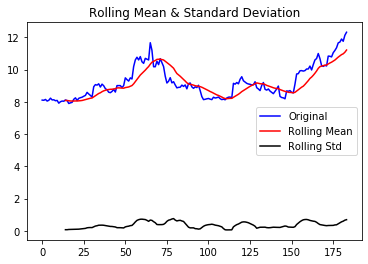

Dickey-Fuller test
Test statistics            -0.393342
p-value                     0.911204
lags                        0.000000
Number of observations    183.000000
Cirtical Value (1%)        -3.466598
Cirtical Value (5%)        -2.877467
Cirtical Value (10%)       -2.575260
dtype: float64


In [104]:
def evaluate_stationarity(timeseries, t=30):
    # Rolmean is the average of t numbers of values; if no enough t, it becomes NaN
    rolmean = timeseries.rolling(window=t).mean()
    # Rolmean is the stdev of t numbers of values; if no enough t, it becomes NaN
    rolstd = timeseries.rolling(window=t).std()
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    print('Dickey-Fuller test')
    # Use Dickey-Fuller for stationarity test
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test statistics', 'p-value', 'lags', 'Number of observations'])
    for key, value in dftest[4].items():
        dfoutput['Cirtical Value (%s) ' % key] = value
    print(dfoutput)
evaluate_stationarity(data_train['Close'], 15)

Although the change in rolling standard deviation is small, the rolling mean seems to have relatively large changes. Therefore, it can be deduced that the time series object is non-stationary. By observing the Dickey-Fuller test results, it is found that the test statistic is greater than the critical value, so the null hypothesis is not rejected, which means that the data is non-stationary in nature.

### Apply logarithmic transformation to time series objects

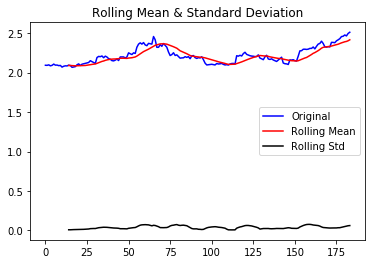

Dickey-Fuller test
Test statistics            -0.640889
p-value                     0.861472
lags                        0.000000
Number of observations    183.000000
Cirtical Value (1%)        -3.466598
Cirtical Value (5%)        -2.877467
Cirtical Value (10%)       -2.575260
dtype: float64


In [105]:
data_log = np.log(data_train['Close'])
evaluate_stationarity(data_log, 15)

It can be found that the logarithmic transformation is indeed effective because it can keep the rolling mean and rolling standard deviation constant. However, the Dickey-Fuller test proved to be incorrect (that is, the transformed time series is still non-stationary). It is inferred from the fact that the test statistic value is greater than the critical value that the null hypothesis is valid, and the logarithmic transformation object is inherently non-stationary.

### Magnified rolling mean of logarithmic transformation distribution

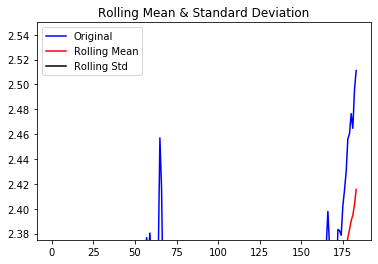

In [106]:
data_log = np.log(data_train['Close'])
rolmean = data_log.rolling(window=15).mean()
rolstd = data_log.rolling(window=15).std()
orig = plt.plot(data_log, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.ylim([2.375, 2.55])
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

The zoomed-in image shows that the rolling mean is changing over time, rather than being constant. This reasoning shows that the Dickey-Fuller test results prove that the transformation sequence is non-stationary. The logarithmic transformation of the data failed to stabilize the object.

### Apply the fourth root transform to a time series object

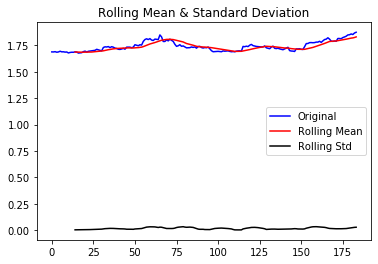

Dickey-Fuller test
Test statistics            -0.580287
p-value                     0.875374
lags                        0.000000
Number of observations    183.000000
Cirtical Value (1%)        -3.466598
Cirtical Value (5%)        -2.877467
Cirtical Value (10%)       -2.575260
dtype: float64


In [107]:
data_sqrt = np.sqrt(np.sqrt(data_train['Close']))
evaluate_stationarity(data_sqrt, 15)

### Apply moving average smoothing to time series objects

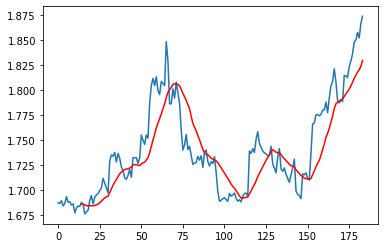

In [108]:
moving_avg = data_sqrt.rolling(15).mean()
plt.plot(data_sqrt)
plt.plot(moving_avg, color='red')

### Print time series objects without trend

In [110]:
data_sqrt_moving_avg_diff = data_sqrt - moving_avg
data_sqrt_moving_avg_diff.head(40)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11         NaN
12         NaN
13         NaN
14    0.001781
15   -0.000198
16   -0.008966
17   -0.006115
18   -0.004252
19    0.005466
20    0.010039
21    0.001865
22    0.008290
23    0.009690
24    0.010539
25    0.012113
26    0.013311
27    0.021020
28    0.014476
29    0.008977
30    0.003130
31    0.031434
32    0.033901
33    0.028880
34    0.029527
35    0.017693
36    0.022990
37    0.015611
38    0.005017
39    0.000049
Name: Close, dtype: float64

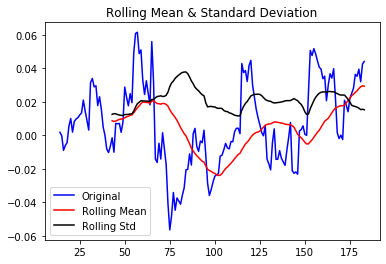

Dickey-Fuller test
Test statistics            -2.808187
p-value                     0.057114
lags                        0.000000
Number of observations    169.000000
Cirtical Value (1%)        -3.469648
Cirtical Value (5%)        -2.878799
Cirtical Value (10%)       -2.575971
dtype: float64


In [111]:
data_sqrt_moving_avg_diff.dropna(inplace=True)
evaluate_stationarity(data_sqrt_moving_avg_diff)

### Application of Exponential Weighted Moving Average Smoothing in Time Series Objects

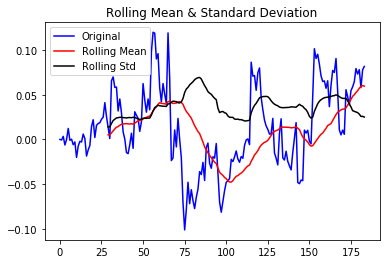

Dickey-Fuller test
Test statistics            -3.372694
p-value                     0.011926
lags                        0.000000
Number of observations    183.000000
Cirtical Value (1%)        -3.466598
Cirtical Value (5%)        -2.877467
Cirtical Value (10%)       -2.575260
dtype: float64


In [112]:
expwighted_avg = data_log.ewm(span=15).mean()
data_log_ewma_diff = data_log - expwighted_avg
evaluate_stationarity(data_log_ewma_diff)

### Apply the first difference to the logarithm of a time series object

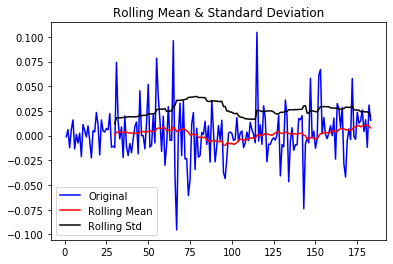

Dickey-Fuller test
Test statistics          -1.042802e+01
p-value                   1.638340e-18
lags                      1.000000e+00
Number of observations    1.810000e+02
Cirtical Value (1%)      -3.467005e+00
Cirtical Value (5%)      -2.877644e+00
Cirtical Value (10%)     -2.575355e+00
dtype: float64


In [113]:
# period：表示移动的幅度，可以是正数，也可以是负数，默认值是1,1就表示移动一次，注意这里移动的都是数据，而索引是不移动的，移动之后没有对应值的，就赋值为NaN。
data_log_diff = data_log - data_log.shift()
data_log_diff.dropna(inplace=True)
evaluate_stationarity(data_log_diff)

Compared with moving average smoothing and exponentially weighted moving smoothing, the difference calculation has been greatly improved. It helps to improve the stationarity of the time series.

### Decompose the logarithmically transformed time series

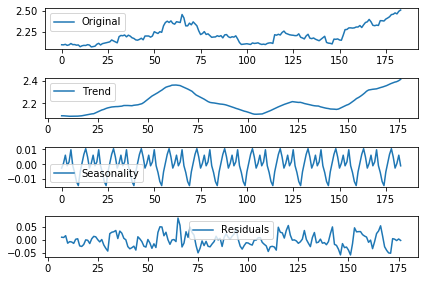

In [114]:
# The return contains three parts:trend part, seasonal part and residual part
decomposition = seasonal_decompose(list(data_log), freq=15)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(data_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

### Evaluate residuals for stationarity purpose

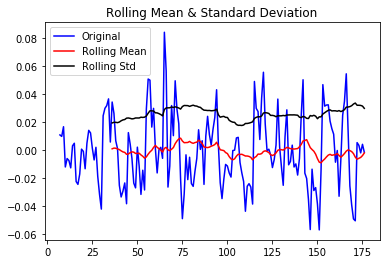

Dickey-Fuller test
Test statistics          -7.310053e+00
p-value                   1.271315e-10
lags                      1.000000e+00
Number of observations    1.680000e+02
Cirtical Value (1%)      -3.469886e+00
Cirtical Value (5%)      -2.878903e+00
Cirtical Value (10%)     -2.576027e+00
dtype: float64


In [115]:
data_log_decompose = pd.Series(residual)
data_log_decompose.dropna(inplace=True)
evaluate_stationarity(data_log_decompose)

Exploratory analysis of rolling mean and rolling standard deviation shows that these two measures are almost stable over time. The residual graph is stationary.

# Test to determine whether the time series has autocorrelation

### Durbin Watson statistics of the time series after calculating the logarithmic-difference transformation 

In [91]:
sm.stats.durbin_watson(data_log_diff)

1.9367062949149663

Durbin Watson statistics are more statistical methods to determine the existence of autocorrelation in data. It is achieved by calculating the autocorrelation between residuals, and these residuals are obtained from statistical regression analysis. It returns a number between 0 and 4, where 0 means strong positive autocorrelation, 4 means strong negative autocorrelation, and 2 means no autocorrelation. The result here is close to 2, which indicates that there is no autocorrelation in the time series after log difference.

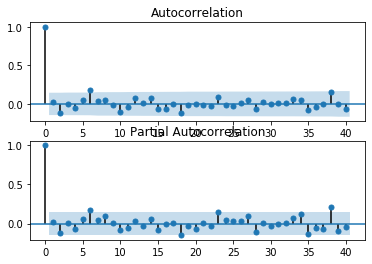

In [116]:
ax1 = plt.subplot(211)
# Plot autocorrelation function ACF
fig = sm.graphics.tsa.plot_acf(data_log_diff.squeeze(), lags=40, ax=ax1)
ax2 = plt.subplot(212)
# Plot partial autocorrelation function PACF
fig = sm.graphics.tsa.plot_pacf(data_log_diff, lags=40, ax=ax2)

Rule 1: p=1. When ACF shows exponential decay, and PACF has a peak at lag 1, there is no further correlation.  
Rule 2: p=2. When ACF shows a set of exponential decay or sinusoidal waveform patterns, and PACF has a peak at lags 1 and 2, there is no further correlation.  
Rule 3: q=1. When ACF has a peak at lag 1, there is no further correlation, and PACF shows exponential decay.  
Rule 4: q=2. A peak occurs when ACF lags 1 and 2, there is no further correlation, and PACF shows a set of exponential decay or sine wave patterns.  
Rule 5: p=1, q=1. When ACF and PACF both show exponential decay when lagging 1, there is no further correlation.  
This example satisfies Rule 6, so there is no autocorrelation.  

# Autoregressive Integrated Moving Average (ARIMA)

### Apply AR model to logarithmic-differential transformation time series

Text(0.5, 1.0, 'RSS: 0.1188')

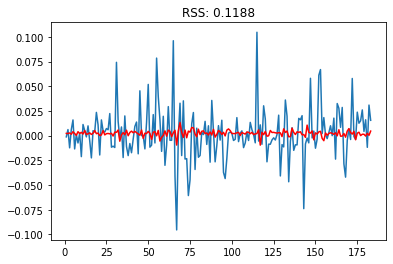

In [117]:
# p=2, d=1, q=0
model = ARIMA(data_log, order=(2, 1, 0), dates=pd.to_datetime(data_log.index))
results_AR_210 = model.fit(disp=-1)
plt.plot(data_log_diff)
plt.plot(results_AR_210.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_AR_210.fittedvalues-data_log_diff)**2))

RSS is close to 0, which means that the model is quite accurate in capturing the variance in the input sequence.

### Apply the MA model to the logarithmic-differential transformation time series

Text(0.5, 1.0, 'RSS: 0.1203')

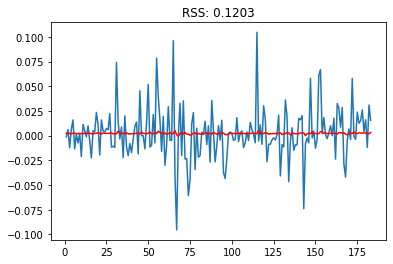

In [118]:
# d=1, q=1
model = ARIMA(data_log, order=(0, 1, 1), dates=pd.to_datetime(data_log.index))
results_MA_011 = model.fit(disp=-1)
plt.plot(data_log_diff)
plt.plot(results_MA_011.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_MA_011.fittedvalues-data_log_diff)**2))

Text(0.5, 1.0, 'RSS: 0.1196')

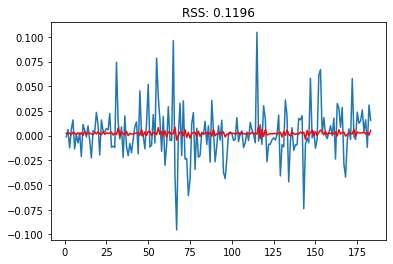

In [119]:
# p=1, d=1, q=1
model = ARIMA(data_log, order=(1, 1, 1), dates=pd.to_datetime(data_log.index))
results_ARIMA_111 = model.fit(disp=-1)
plt.plot(data_log_diff)
plt.plot(results_ARIMA_111.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_ARIMA_111.fittedvalues-data_log_diff)**2))

# Reduce forecast scale

### Print the first few observations of the forecast sequence

In [120]:
predictions_ARIMA_diff = pd.Series(results_ARIMA_111.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

1    0.002279
2    0.002060
3    0.002670
4    0.001068
5    0.003304
dtype: float64


In [121]:
# Returns the cumulative sum on the given axis
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

1    0.002279
2    0.004339
3    0.007009
4    0.008076
5    0.011381
dtype: float64


### Print the AIC score of the predicted sequence

In [122]:
print(results_ARIMA_111.aic)

-814.5701222709382


The lower the AIC score, the better the quality of the time series model.

### Print the predicted time series with no differences

In [123]:
predictions_ARIMA_log = pd.Series(data_log[0], index=data_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

0    2.093098
1    2.095377
2    2.097437
3    2.100106
4    2.101174
dtype: float64

Text(0.5, 1.0, 'MSE: 1.8387 | MAE: 1.0930 | R2: -0.7862')

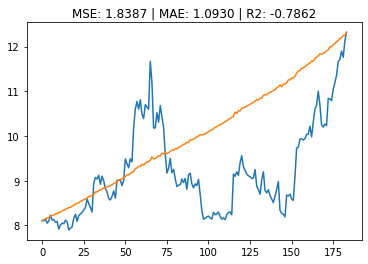

In [124]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(data_train['Close'])
plt.plot(predictions_ARIMA)
plt.title('MSE: %.4f | MAE: %.4f | R2: %.4f' % ( mean_squared_error(data_train['Close'], predictions_ARIMA), 
                                                 mean_absolute_error(data_train['Close'], predictions_ARIMA), 
                                                 r2_score(data_train['Close'], predictions_ARIMA)))

-0.36897030318166335


Text(0, 0.5, 'Concrete strength')

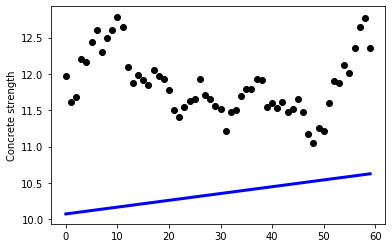

In [125]:
regr = LinearRegression()
x_train = [[x] for x in range(len(data_train))]
y_train = [[y] for y in list(data_train['Close'])]
x_test = [[z] for z in range(len(data_train), len(data_train)+len(data_test))]
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)
print(explained_variance_score(data_test['Close'], y_pred))
plt.scatter(range(len(data_test)), data_test['Close'], color='black')
plt.plot(range(len(data_test)), y_pred, color='blue', linewidth=3)
plt.ylabel('Concrete strength')

  
## Reference:
https://github.com/wzy6642/Machine-Learning-Case-Studies